In [1]:
using ForneyLab, Flux, Plots, Random, LinearAlgebra
using IterTools: ncycle

In [2]:
Random.seed!(12345);

# Synthetic Dataset

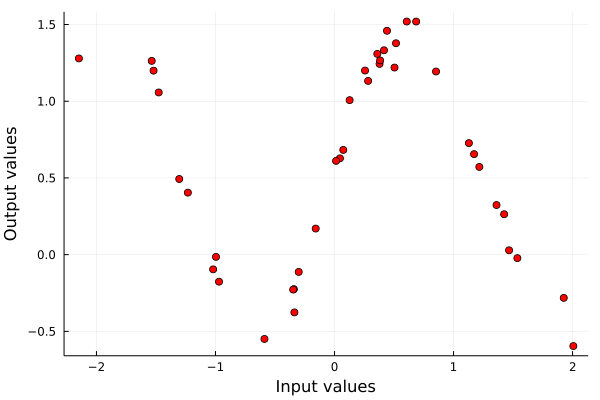

In [3]:
N = 40
x_vals = randn(N)
y_vals = sin.(2.5.*x_vals) .+ 0.5 .+ randn(N)./10
scatter(x_vals, y_vals, legend=false, xlabel="Input values", ylabel="Output values", color=:red)

# Neural Network

In [4]:
# NN specification is adopted from Turing.jl's BNN example
# See https://turing.ml/dev/tutorials/03-bayesian-neural-network/

function unpack(nn_params)
    W₁ = reshape(nn_params[1:3], 3, 1);   
    b₁ = nn_params[4:6]
    
    W₂ = reshape(nn_params[7:15], 3, 3); 
    b₂ = nn_params[16:18]
    
    Wₒ = reshape(nn_params[19:21], 1, 3); 
    bₒ = nn_params[22:22]
    return W₁, b₁, W₂, b₂, Wₒ, bₒ
end


function nn_forward(x_vals, nn_params)
    W₁, b₁, W₂, b₂, Wₒ, bₒ = unpack(nn_params)
    nn = Chain(Dense(W₁, b₁, tanh),
               Dense(W₂, b₂, tanh),
               Dense(Wₒ, bₒ))
    return nn([x_vals])[1]
end;

# ForneyLab Model Specification

In [5]:
# Model
graph = FactorGraph()

@RV weights ~ GaussianMeanPrecision(zeros(22), diagm(0=>ones(22)))

f(w) = nn_forward.([x_vals[i] for i=1:N],ncycle([w], N))
@RV z ~ Cvi(weights,g=f,opt=Descent(0.01),num_samples=1,num_iterations=10000)
# cc = ConvergenceParamsMC()
# @RV z ~ Cvi(weights,g=f,opt=Descent(0.01),num_samples=1,num_iterations=1,convergence_optimizer=cc)
@RV y ~ GaussianMeanVariance(z,0.1.*diagm(0=>ones(N)))
placeholder(y, :y, dims=(N,))
;

In [6]:
ForneyLab.draw()

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.40.1 (20161225.0304)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 12415538403621365282 -->
 
 12415538403621365282 
 
 𝒩 
 gaussianmeanprecision_1 
 
<!-- 4219024095635930546 -->
 
 4219024095635930546 
 
 clamp_2 
 
<!-- 12415538403621365282--4219024095635930546 -->
 
 12415538403621365282--4219024095635930546 
 
 clamp_2 
 1 out 
 3 w 
 
<!-- 17616383214695205797 -->
 
 17616383214695205797 
 
 clamp_1 
 
<!-- 12415538403621365282--17616383214695205797 -->
 
 12415538403621365282--17616383214695205797 
 
 clamp_1 
 1 out 
 2 m 
 
<!-- 12162015591988465471 -->
 
 12162015591988465471 
 
 𝒩 
 gaussianmeanvariance_1 
 
<!-- 6477308988932974908 -->
 
 6477308988932974908 
 
 clamp_3 
 
<!-- 12162015591988465471--6477308988932974908 -->
 
 12162015591988465471--6477308988932974908 
 
 clamp_3 
 1 out 
 3 v 
 
<!-- 15495355873712536405 -->
 
 15495355873712536405 
 
 cvi 
 cvi_1 
 
<!-- 12162015591988465471--15495355873712536405 -->
 
 12162015591988465471--15495355873712536405 
 
 z 
 1 out 
 2 m 
 
<!-- 18024115700286054547 -->
 
 18024115700286054547 
 
 placeholder_y 
 
<!-- 18024115700286054547--12162015591988465471 -->
 
 18024115700286054547--12162015591988465471 
 
 y 
 1 out 
 1 out 
 
<!-- 15495355873712536405--12415538403621365282 -->
 
 15495355873712536405--12415538403621365282 
 
 weights 
 1 out 
 2 in1

# Algorithm Generation for Inference

In [7]:
algo = messagePassingAlgorithm(weights)
source_code = algorithmSourceCode(algo)
eval(Meta.parse(source_code))
;

In [8]:
println(source_code)

begin

function step!(data::Dict, marginals::Dict=Dict(), messages::Vector{Message}=Array{Message}(undef, 3))

messages[1] = ruleSPGaussianMeanPrecisionOutNPP(nothing, Message(Multivariate, PointMass, m=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), Message(MatrixVariate, PointMass, m=[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 

In [9]:
data = Dict(:y => y_vals)

marginals = step!(data)

Dict{Any,Any} with 1 entry:
  :weights => 𝒩(xi=[-1.61e+02, 1.19e+02, 79.38, -2.39e+02, 2.93e+02, -63.83, 1.…

In [10]:
# Generate samples using inferred posterior over weights

x_range = collect(-5:0.01:5)
N_samp = 100
y_range = zeros(N_samp, length(x_range))
for i = 1:length(x_range)
    x = x_range[i]
    y_range[:,i] = nn_forward.([x],sample(marginals[:weights],N_samp))
end

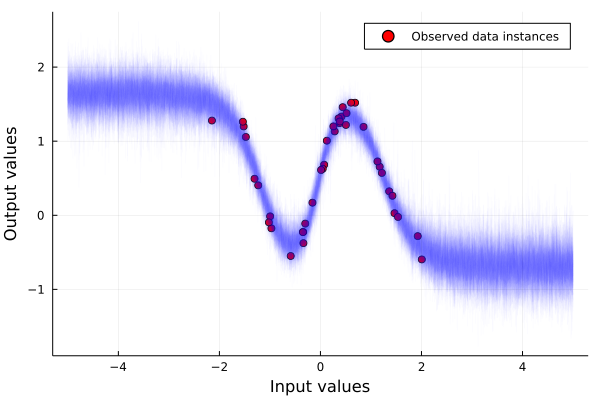

In [11]:
scatter(x_vals, y_vals, label="Observed data instances", xlabel="Input values", ylabel="Output values", color=:red)
for i=1:N_samp-1
    plot!(x_range, y_range[i,:], color=:blue2, alpha=0.015, label=false)
end
plot!(x_range, y_range[N_samp,:], color=:blue2, alpha=0.015, label=false)